#**Statistics**#

In [1]:
import pandas as pd
df = pd.read_csv('/content/people.csv')
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [2]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

**Problem Statement**

1. Check using test that Statisfactory column is normally distributted or not.


2. Create a filter of data when satisfactory level is between 0 to 0.05, and time spend in the company is 2 years and also average monthly hours is in between 130 to 200 hrs


3. In second question check whether The average monthly hours of a employee having 2 years experience is 167. Also check Is it same for employees having more than 2 years experience?

Condition - Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200


4. The percentage of employee leaving the company is 3% having experience of 2 years. Is it same for employees having more than 2 years experience?

5. Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs ?



**Recap**

In [3]:
# INFERENTIAL STATS
# P-value
# Significance Values (alpha values)
# Confidence Interval
# Hypothesis Testing

**P_value : The p value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true. P values are used in hypothesis testing to help decide whether to reject the null hypothesis**

**Significance Values: It is a value which is mostly taken as 0.05 i.e 5%.  We will compare P value and alpha value with each other . If P value is less than alpha our sample is good to go.**

<hr>

Step 1: Basic EDA and data Processing

<hr>

In [4]:
list(df.columns)

['satisfactoryLevel',
 'lastEvaluation',
 'numberOfProjects',
 'avgMonthlyHours',
 'timeSpent.company',
 'workAccident',
 'left',
 'promotionInLast5years',
 'dept',
 'salary']

1. info() : for getting the overviews
2. describe(): For stats values

In [5]:
# what if I want to get a overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Insights:

1. We are having 2 object col and 8 numerical

2. Salary was a categorical columns, we need to encode this column into the numerical columns

In [7]:
# getting the stats values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfactoryLevel,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
lastEvaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
numberOfProjects,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
avgMonthlyHours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
timeSpent.company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
workAccident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotionInLast5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


Insight:
1. In the first column, the mean and the median are having a very less difference, but when we talk about the mode, it's very far away, and hence assumed that the data is not normalily distributed.

In [8]:
# check for every columns

df.describe(include = 'O').T

,count,unique,top,freq
dept,14999,10,sales,4140
salary,14999,3,low,7316


Insight:

1. Most of the people are having low salaries
2. The most occuring dept is sales

Second Part

In [10]:
# what was the time spent in the company
df['timeSpent.company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: timeSpent.company, dtype: int64

People with tenure of 2 years = 3244

In [12]:
df.timeSpent.company

AttributeError: ignored

In [14]:
df.rename(columns = {'timeSpent.company': 'timeSpent_company'}, inplace = True)

In [16]:
df.timeSpent_company

0        3
1        6
2        4
3        3
4        3
        ..
14994    4
14995    2
14996    4
14997    5
14998    3
Name: timeSpent_company, Length: 14999, dtype: int64

In [17]:
from scipy.constants import pi

In [18]:
print(pi)

3.141592653589793


**NORMALITY TEST**

The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold). The formula for the W value is:

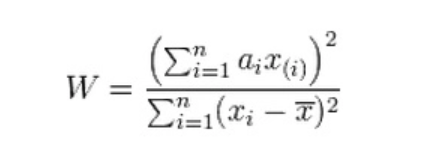


where:


xi are the ordered random sample values


ai are constants generated from the covariances, variances and means of the sample (size n) from a normally distributed sample.

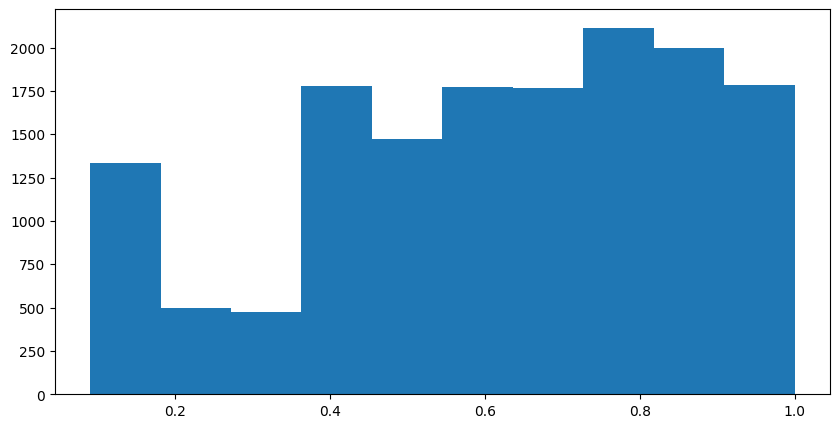

In [19]:
# IF I WANT TO CHECK THE DISTRIBUTION
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.figure(figsize = (10, 5))
plt.hist(df['satisfactoryLevel'])
plt.show()

<Axes: xlabel='satisfactoryLevel', ylabel='Density'>

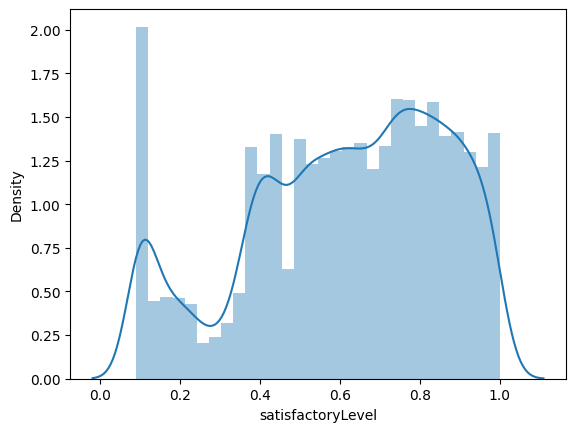

In [20]:
sns.distplot(df['satisfactoryLevel'])

<Axes: xlabel='satisfactoryLevel', ylabel='Density'>

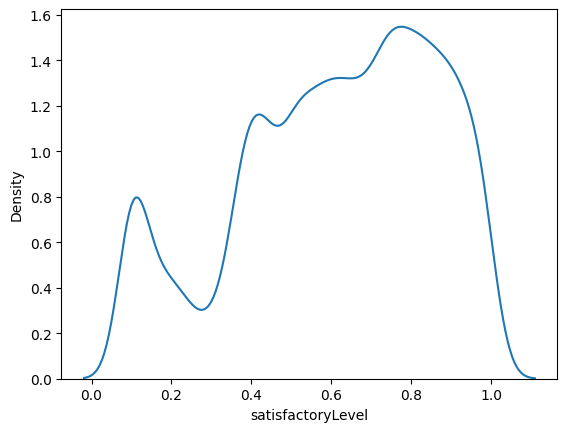

In [21]:
sns.kdeplot(x = 'satisfactoryLevel', data = df)

Seems to us the data is not normally distributed.

Let's try shapiro test
1. Null (No) -> That data is normally distributed
2. Alternate -> That data is not normally distributed

**if p value is less than significance value we have to reject null hypothesis**

In [22]:
from scipy.stats import shapiro

In [23]:
# this return us two values, 1) P-value and the second would be a stats
stats, p_val = shapiro(df['satisfactoryLevel'])

In [24]:
print(p_val)

0.0


In [26]:
print(stats)

0.9518879652023315


**p value is less than 0.05 reject null hypothesis, data is not normally distributed**

In [27]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [ ]:
# feature engineering
# feature encoding

In [28]:
# ValueError: That we were uable string into float
# encoding - >nominal and ordinal
# nominal -> One Hot encoding

In [30]:
df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [31]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

1. OneHotEncoding: It for non-ordered categorical data (Nominal Data)

2. LabelEncoding: It is for the ordered categorical data (Ordinal Data)

In [32]:
# using preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])

In [33]:
df.salary.value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

1. fit(): calculate the mean and std dev

2. tranform(): then fits the data based upon the collected characteristics

In [35]:
df['dept'] = le.fit_transform(df['dept'])

In [36]:
df.dept.value_counts()

7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: dept, dtype: int64

In [37]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [40]:
# correlation
df.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
lastEvaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
numberOfProjects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
avgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
timeSpent_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotionInLast5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
dept,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


<Axes: >

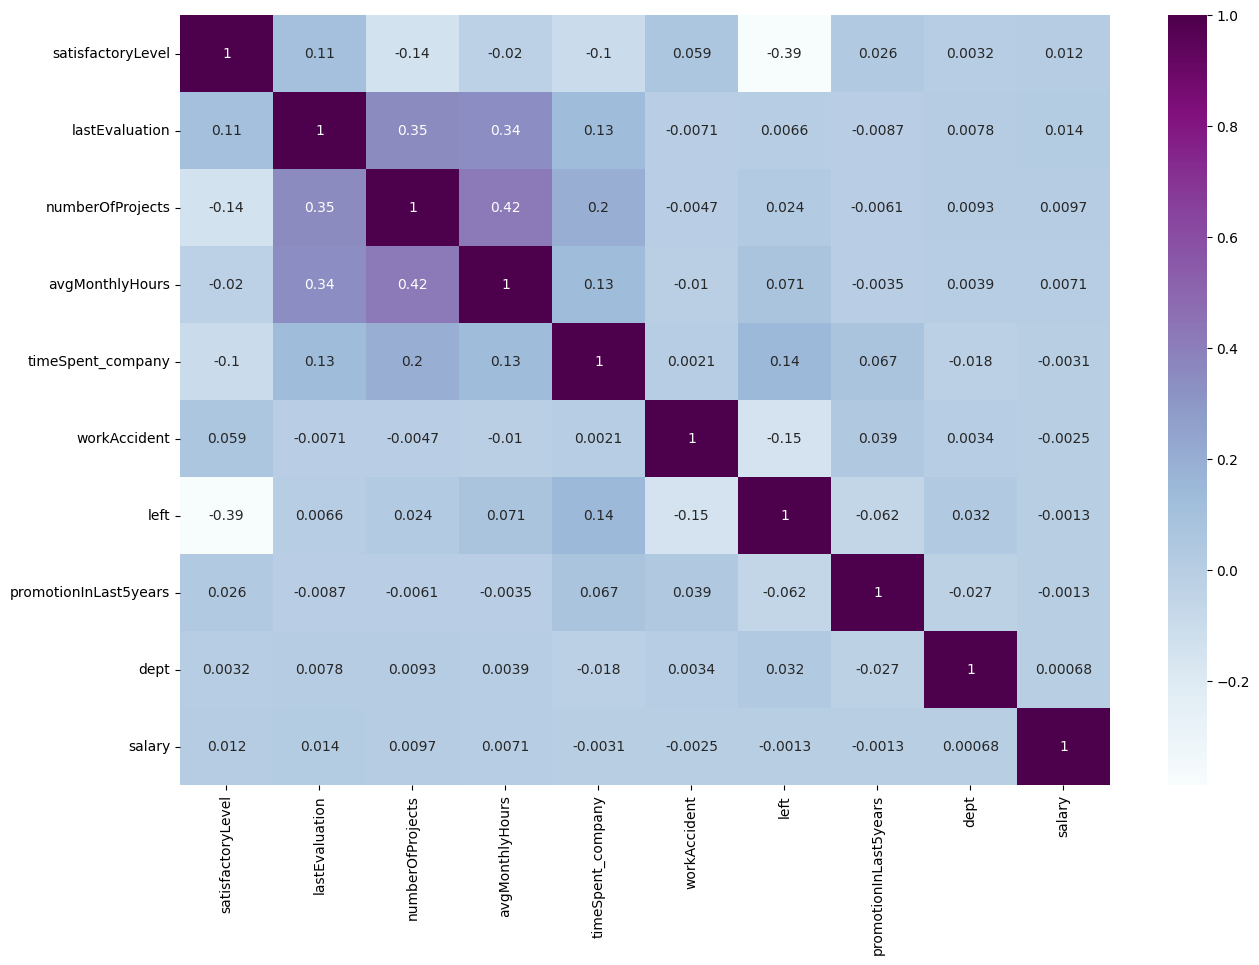

In [41]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu')

We don't have a lot of correlated columns in the dataset

In [42]:
#random experiment (0.05)
emp = df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.5)&(df.timeSpent_company==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [43]:
emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1
1239,0.14,0.47,4,175,2,0,1,0,1,2
1426,0.19,0.58,5,182,2,0,0,0,9,2


In [45]:
emp.shape

(251, 10)

Whether the mean is 167 or not

In [46]:
emp['avgMonthlyHours'].mean()

166.9561752988048

**T_TEST**
IT IS USED TO DETERMINE IF THERE IS A SIGNIFICANT DIFFERENCE BETWEEN THE MEAN OF THE TWO GROUPS

ASSUMPTIONS:

1. Sample Size less that 30
2. Data is assumed to be normally distributed
3. Variance is unknown

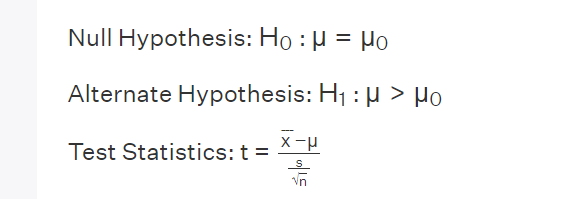

The average monthly hours of a employee having 2 years experience is 167. Is it same for employees having more than 2 years experience?

Condition - Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200


In [47]:
emp1 = df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.5)&(df.timeSpent_company>2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [48]:
emp1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
7,0.42,0.53,2,142,3,0,1,0,7,1
8,0.45,0.54,2,135,3,0,1,0,7,1


In [50]:
emp1.shape

(2221, 10)

1. null hypothesis - avg monthly hours of a employee having 2 yrs exp and the employee more than that is same i.e, 167 hrs

2. alternate hypothesis - avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 2 yrs exp employee


In [51]:
# select a random sample
sample_size = 100
sam1 = emp1.sample(sample_size, random_state = 0)

In [52]:
sam1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
14405,0.36,0.52,2,147,3,0,1,0,7,2
243,0.41,0.54,2,145,3,0,1,0,8,1
9528,0.42,0.46,2,150,3,0,1,0,7,2
2165,0.17,0.93,5,183,5,0,0,0,2,0
90,0.41,0.46,2,151,3,0,1,0,6,1
...,...,...,...,...,...,...,...,...,...,...
11065,0.22,0.94,3,193,10,0,0,1,4,0
2986,0.29,0.77,3,152,3,1,0,0,9,1
781,0.43,0.49,2,135,3,0,1,0,9,1
4584,0.47,0.47,4,191,3,0,0,0,9,2


In [53]:
# population means: 167 (appox)
pos_mean = 167 #(166.9588 == 167)

In [54]:
print(sam1.avgMonthlyHours.mean())

154.97


In [55]:
from scipy.stats import ttest_1samp
stats, p_val = ttest_1samp(sam1['avgMonthlyHours'], pos_mean)
# pos_mean is the population mean = 167
print(stats, p_val)

-6.366238808444288 6.08949731659886e-09


1. If the p_val > 0.05, reject null hypothesis,avg monthly hours is not 167 hours for employees having more than 2 yrs of exp